<a href="https://colab.research.google.com/github/linainsaf/ML-M1/blob/main/Classification_avec_Foret_d'arbres_aleatoires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def visualize_classifier(model, X, y):
 ax = plt.gca()
 # Plot the training points
 ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
 clim=(y.min(), y.max()), zorder=3)
 ax.axis('tight')
 ax.axis('off')
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
 np.linspace(*ylim, num=200))
 Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
 # Create a color plot with the results
 n_classes = len(np.unique(y))
 contours = ax.contourf(xx, yy, Z, alpha=0.3,
 levels=np.arange(n_classes + 1) - 0.5,
 cmap='rainbow', zorder=1)
 ax.set(xlim=xlim, ylim=ylim)
 plt.show()

I. Chargement et visualisation des données:

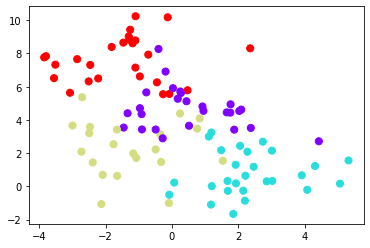

In [ ]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow');
plt.show()

Combien y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la
dimension des données ?

In [ ]:
print("nombre de points en train : ", len(X_train))
print("nombre de points en test : ", len(X_test))

print("Dimensions de X_train : ", np.shape(X_train))
print("Dimensions de X_test : ", np.shape(X_test))
print("Dimensions de y_train : ", np.shape(y_train))
print("Dimensions de y_test : ", np.shape(y_test))

nombre de points en train :  100
nombre de points en test :  4900
Dimensions de X_train :  (100, 2)
Dimensions de X_test :  (4900, 2)
Dimensions de y_train :  (100,)
Dimensions de y_test :  (4900,)


II. Arbre de décision


a. Principe des arbres de décision

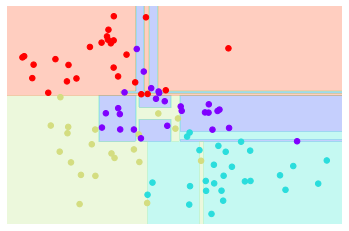

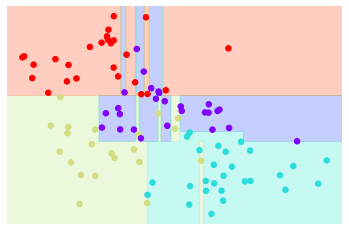

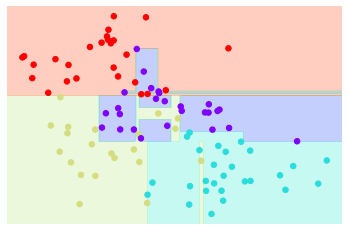

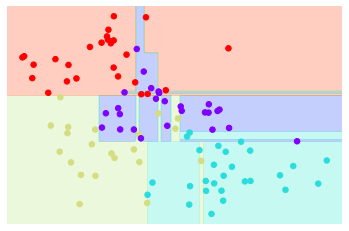

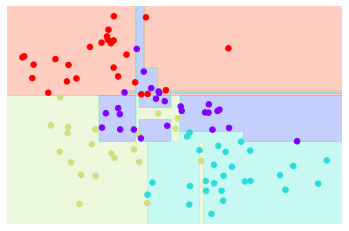

In [ ]:
for i in range(10,15):
  tree = DecisionTreeClassifier(criterion='entropy',max_depth = i)
  tree.fit(X_train, y_train)
  visualize_classifier(tree, X_train, y_train)

Commentaires: 

Que représente la variable max_depth ?
La faire varier de 1 à 20 et commenter les résultats obtenus visuellement. Retrouvez-vous
toutes les découpes ?

b. Performance d’un classifieur muti-classes

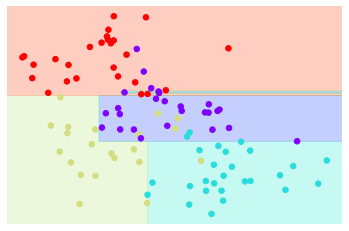

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
tree.fit(X_train, y_train)
visualize_classifier(tree, X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1224
           1       0.81      0.80      0.80      1223
           2       0.78      0.63      0.70      1229
           3       0.80      0.93      0.86      1224

    accuracy                           0.75      4900
   macro avg       0.75      0.75      0.74      4900
weighted avg       0.75      0.75      0.74      4900



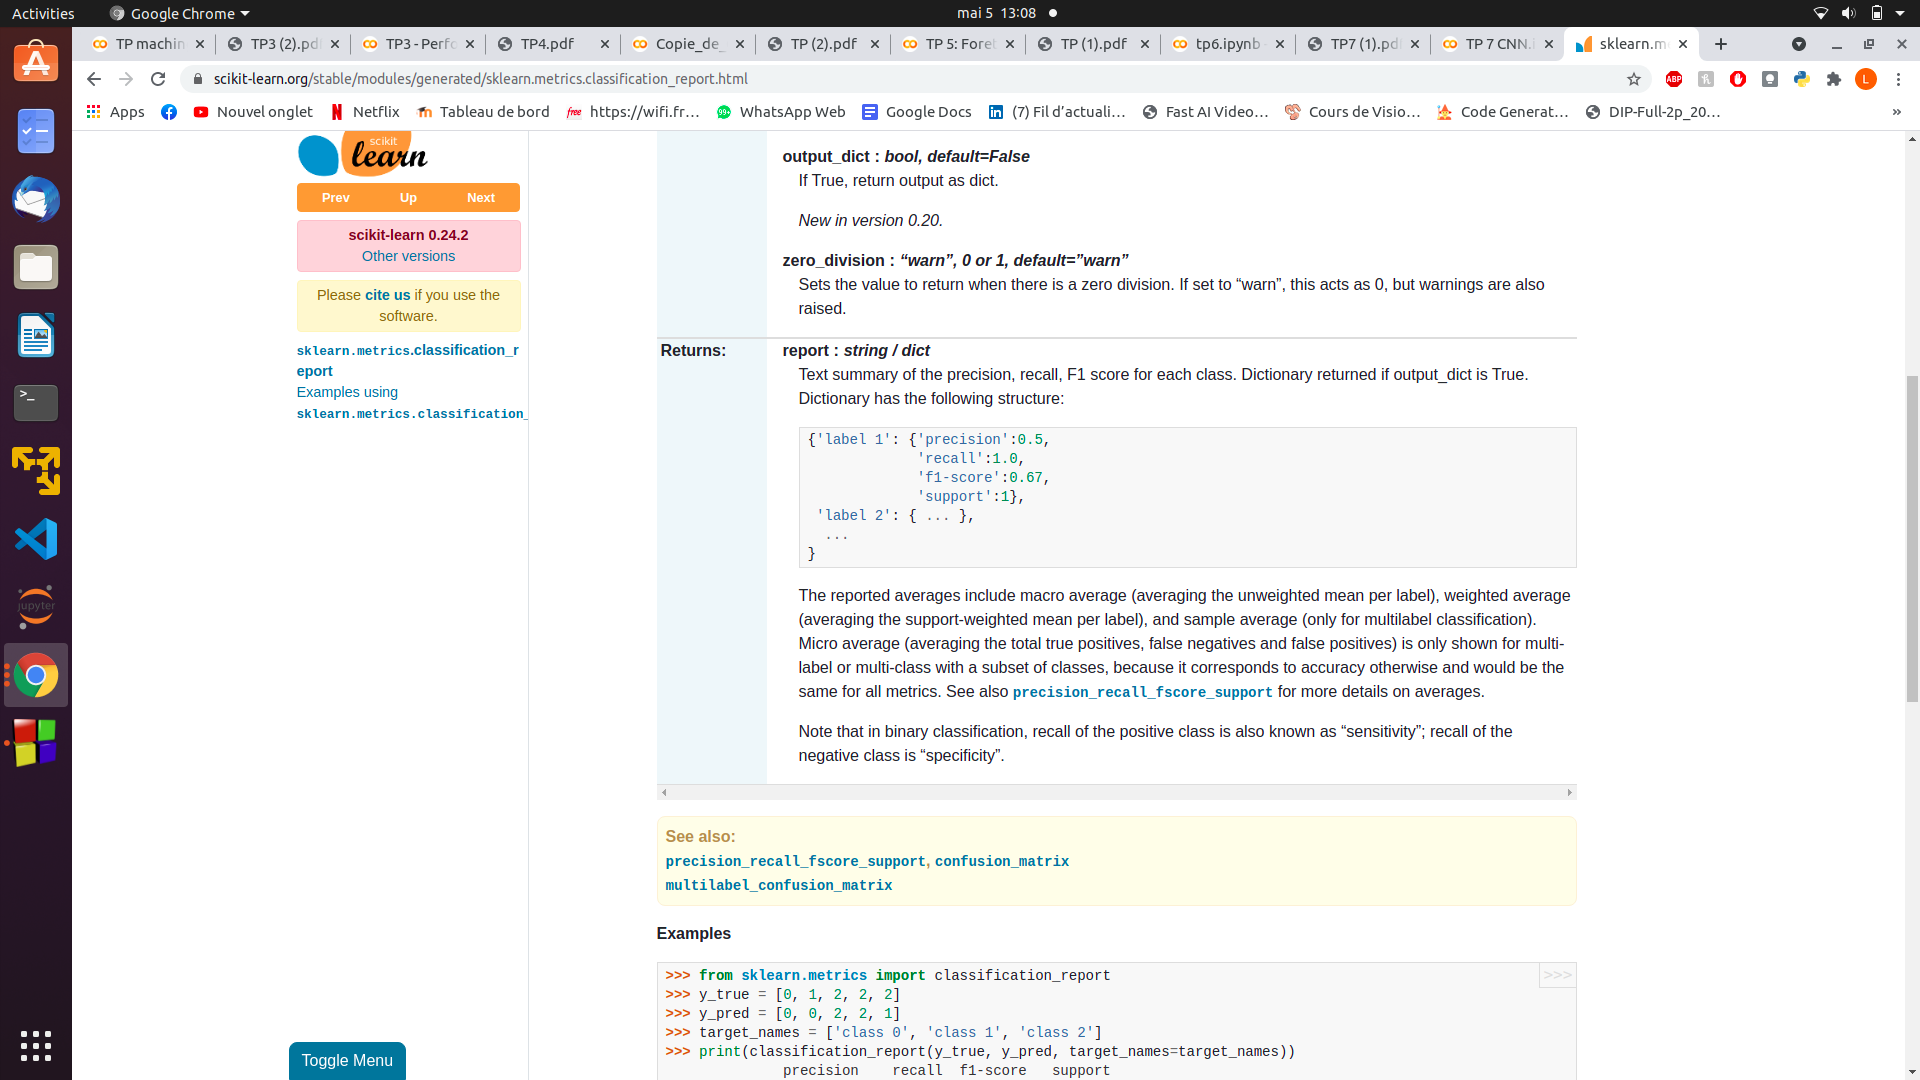

In [ ]:
tree.feature_importances_

array([0.33227377, 0.66772623])

Que représentent les valeurs renvoyées par classification_report ? Pouvez-vous retrouver la
première ligne à partir de la matrice de confusion ?

In [ ]:
print("f1-score classe 0 = ",C[0][0]/np.sum(C[:][0]))
print("accuracy_score = ",np.sum(np.diag(C))/np.sum(C)) 

f1-score classe 0 =  0.630718954248366
accuracy_score =  0.7471428571428571


c. Optimisation de la profondeur de l’arbre

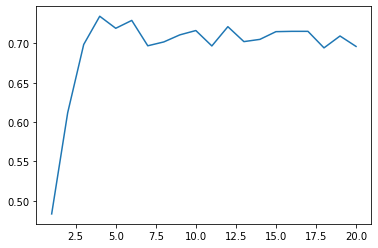

In [ ]:
max_depth=[]
score=[]
for i in range(1,21):
  tree = DecisionTreeClassifier(criterion='entropy',max_depth = i)
  tree.fit(X_train, y_train)
  y_pred=tree.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  max_depth.append(i)
# Variation du taux de reconnaissance en fonction de k :
plt.plot(max_depth,score)

III. Arbre de décision sur des données de grande dimension

a. Classification avec un arbre de décision

In [ ]:
[X_train, y_train, X_test, y_test] = np.load("TP5b.npy",allow_pickle=True)

Quelle est leur dimension ? Combien y a t-il de points en apprentissage et en test ? 

In [ ]:
print("nombre de points en train : ", len(X_train))
print("nombre de points en test : ", len(X_test))

print("Dimensions de X_train : ", np.shape(X_train))
print("Dimensions de X_test : ", np.shape(X_test))
print("Dimensions de y_train : ", np.shape(y_train))
print("Dimensions de y_test : ", np.shape(y_test))


nombre de points en train :  966
nombre de points en test :  322
Dimensions de X_train :  (966, 50)
Dimensions de X_test :  (322, 50)
Dimensions de y_train :  (966,)
Dimensions de y_test :  (322,)


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.48      0.48      0.48        60
           2       0.30      0.44      0.36        27
           3       0.62      0.66      0.64       146
           4       0.26      0.32      0.29        25
           5       0.54      0.47      0.50        15
           6       0.00      0.00      0.00        36

    accuracy                           0.49       322
   macro avg       0.36      0.39      0.38       322
weighted avg       0.45      0.49      0.47       322



Combien y a-t-il de classes ? : 

Il y a 7 classe 

Reprendre la question c. de l’exercice précédent. Conclusion ?

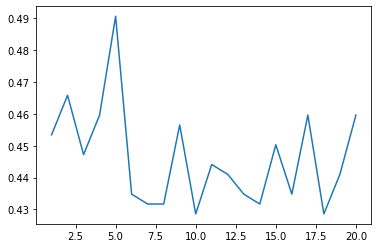

In [ ]:
max_depth=[]
score=[]
for i in range(1,21):
  tree = DecisionTreeClassifier(criterion='entropy',max_depth = i)
  tree.fit(X_train, y_train)
  y_pred=tree.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  max_depth.append(i)
# Variation du taux de reconnaissance en fonction de k :
plt.plot(max_depth,score)

Commentaires:

Tres mauvais taux de reconnaissance quand on a plusieurs features.

- b. Forêt d’arbres aléatoires

In [ ]:
RF = RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.6708074534161491
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.69      0.78      0.73        60
           2       0.67      0.44      0.53        27
           3       0.67      0.92      0.78       146
           4       0.40      0.16      0.23        25
           5       0.83      0.33      0.48        15
           6       0.64      0.25      0.36        36

    accuracy                           0.67       322
   macro avg       0.70      0.46      0.51       322
weighted avg       0.67      0.67      0.63       322



Tester le classifieur avec les paramètres par défaut et 30 arbres. 
- Conclusion: better



Utiliser la fonction GridSearchCV() pour optimiser les paramètres de la forêt.
Quelle est le taux de reconnaissance obtenu avec les paramètres trouvés par GridSearchCV ?


In [ ]:
param_grid = { 
    'n_estimators': [100,400],
    'max_features': ['auto'],
    'max_depth' : [4,6,8,12,13,14,16],
    'criterion' :['entropy'],
}
CV_rfc = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=30, n_jobs=None,
                                              oob_score=False, ran

In [ ]:
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

{'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 400}
0.7111801242236024
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.83      0.75      0.79        60
           2       1.00      0.48      0.65        27
           3       0.65      1.00      0.78       146
           4       0.80      0.16      0.27        25
           5       1.00      0.33      0.50        15
           6       0.81      0.36      0.50        36

    accuracy                           0.71       322
   macro avg       0.87      0.47      0.55       322
weighted avg       0.77      0.71      0.67       322



- Conclusion:

the accuracy is way better when we use multiple trees

- Que représente le paramètre cv de GridSearchCV ?

Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 5-fold cross validation,

integer, to specify the number of folds in a (Stratified)KFold,

CV splitter,An iterable yielding (train, test) splits as arrays of indices.

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.